<a href="https://colab.research.google.com/github/UNCL3LO/AthleticsMedalPredictor/blob/main/Weather_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
weather = pd.read_csv('local_weather.csv', index_col="DATE")

In [ ]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
ACMH,0.653360
ACSH,0.653360
AWND,0.522451
DAPR,0.999525
FMTM,0.870099
FRGT,0.999881
MDPR,0.999525
PGTM,0.495106


In [ ]:
core_weather = weather[["PRCP","SNOW","SNWD", "TMAX", "TMIN"]].copy()

In [ ]:
core_weather.columns =["precip","snow","snow_depth","temp_max","temp_min"]

In [ ]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

,0
precip,0.016668
snow,0.324990
snow_depth,0.317634
temp_max,0.000534
temp_min,0.000593


In [ ]:
core_weather["snow"].value_counts()

,count
snow,
0.0,11379
1.0,1


In [ ]:
del core_weather["snow"]

In [ ]:
del core_weather["snow_depth"]

In [ ]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [ ]:
core_weather["precip"].value_counts()

,count
precip,
0.00,13664
0.01,438
0.02,199
0.03,122
0.04,102
...,...
1.46,1
3.58,1
3.39,1


In [ ]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [ ]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [ ]:
core_weather= core_weather.fillna(method="ffill")

/tmp/ipython-input-488781109.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather= core_weather.fillna(method="ffill")


In [ ]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,


In [ ]:
core_weather.dtypes

,0
precip,float64
temp_max,float64
temp_min,float64


In [ ]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [ ]:
core_weather.index= pd.to_datetime(core_weather.index)

In [ ]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [ ]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=16859)

In [ ]:
core_weather.apply(lambda x: (x==9999).sum())

,0
precip,0
temp_max,0
temp_min,0


<Axes: xlabel='DATE'>

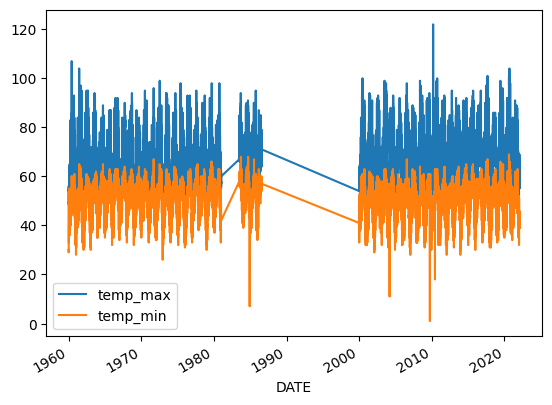

In [ ]:
core_weather[["temp_max","temp_min"]].plot()

In [ ]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
1960,366
1961,365
1962,365
1963,365
1964,366
1965,365
1966,365
1967,365
1968,366


<Axes: xlabel='DATE'>

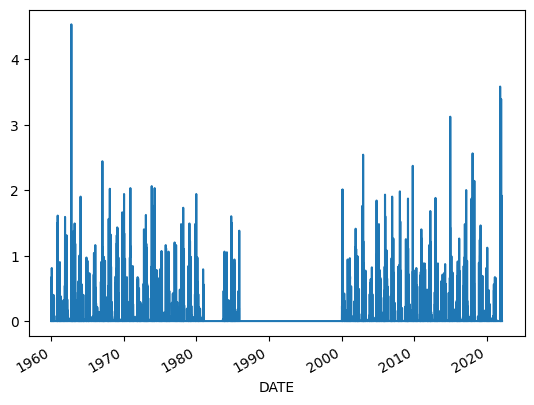

In [ ]:
core_weather["precip"].plot()

In [ ]:
core_weather["target"]= core_weather.shift(-1)["temp_max"]

In [ ]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [ ]:
core_weather =core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [ ]:
from sklearn.linear_model import Ridge
reg =Ridge(alpha=.1)

In [ ]:
predictors=["precip", "temp_max", "temp_min"]

In [ ]:
train=core_weather.loc[:"2020-12-31"]
test=core_weather.loc["2021-01-01":]

In [ ]:
reg.fit(train[predictors],train["target"])
Ridge(alpha=0.1)
predictions= reg.predict(test[predictors])


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test["target"],predictions)

3.4111699434528306

In [ ]:
combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)],axis=1)
combined.columns =["actual","predictions"]

In [ ]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

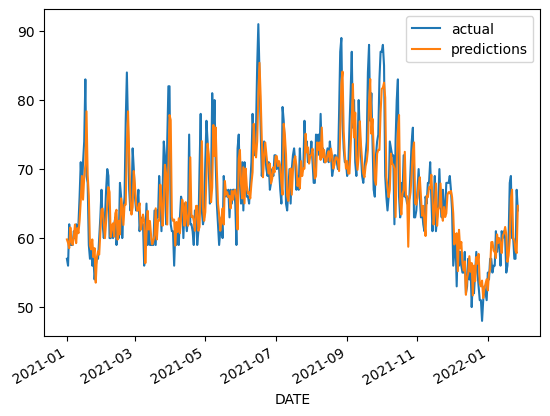

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [ ]:
def create_predictions(predictors,core_weather, reg):
    train=core_weather.loc[:"2020-12-31"]
    test=core_weather.loc["2021-01-01":]
    reg.fit(train[predictors],train["target"])
    predictions= reg.predict(test[predictors])
    error= mean_absolute_error(test["target"],predictions)
    combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)],axis=1)
    combined.columns =["actual","predictions"]
    return error, combined

In [ ]:
core_weather["month_max"]= core_weather["temp_max"].rolling(30).mean()

In [ ]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [ ]:
core_weather["month_day_max"]= core_weather["month_max"]/core_weather["temp_max"]

In [ ]:
core_weather["max_min"]= core_weather["temp_max"]/core_weather["temp_min"]

In [ ]:
predictors= ["precip", "temp_max", "temp_min", "month_max","month_day_max","max_min"]

In [ ]:
core_weather = core_weather.iloc[30:,:].copy()

In [ ]:
error, combined = create_predictions(predictors,core_weather, reg)

<Axes: xlabel='DATE'>

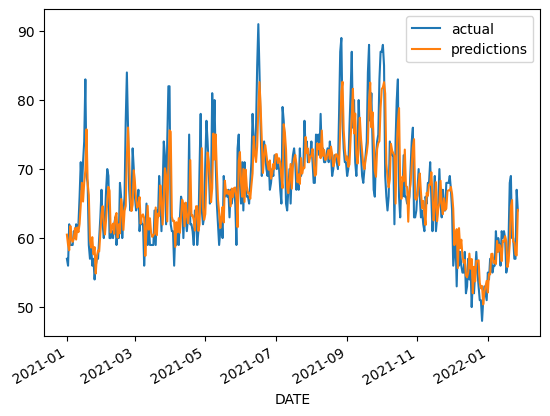

In [ ]:
combined.plot()

In [ ]:
core_weather["monthly_avg"]= core_weather["temp_max"].groupby(core_weather.index.month).transform(lambda x: x.expanding(1).mean())

In [ ]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [ ]:
core_weather["day_of_year_avg"]= core_weather["temp_max"].groupby(core_weather.index.day_of_year).transform(lambda x: x.expanding(1).mean())

In [ ]:
predictors= ["precip", "temp_max", "temp_min", "month_max","month_day_max","max_min","monthly_avg","day_of_year_avg",]

In [ ]:
error, combined =create_predictions(predictors,core_weather, reg)

In [ ]:
error

3.3176926587659956

In [ ]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [ ]:
core_weather.corr()["target"]

,target
precip,-0.205413
temp_max,0.821650
temp_min,0.596016
target,1.000000
month_max,0.686842
month_day_max,-0.421537
max_min,0.045228
monthly_avg,0.689805
day_of_year_avg,0.712334


In [ ]:
combined["diff"]= (combined["actual"]-combined["predictions"]).abs()

In [ ]:
combined["diff"]

,diff
DATE,
2021-01-01,2.565585
2021-01-02,1.603636
2021-01-03,5.033388
2021-01-04,1.728732
2021-01-05,0.103981
...,...
2022-01-23,0.660784
2022-01-24,2.301424
2022-01-25,0.427889


In [ ]:
combined.sort_values("diff",ascending=False)

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
2021-02-22,84.0,71.168844,12.831156
2021-10-16,66.0,78.823197,12.823197
...,...,...,...
2022-01-16,60.0,60.045512,0.045512
2021-11-30,67.0,66.962777,0.037223
2022-01-06,56.0,55.964910,0.035090


weather for whole week
other weather stations